In [1]:
from util import *
from sklearn.model_selection import KFold

### 0. Load data for RF and SVM

train.csv and test.csv is formed manually from features_3_sec.csv such that they contain good mix of all types of genre. This dataset is used everywhere everywhere except in 1.2. In 1.2, we used features_30_sec.csv for testing out best hyper parameters using randomized cross validation.

In [2]:
X_train, y_train = load_preprocess_xy('data/train.csv',0, True, False, False) #scale X, no encode y, no dummify y
X_test, y_test = load_preprocess_xy('data/test.csv',0, True, False, False)

# 1. Random Forest

In [2]:
from random_forest import *

### 1.1. Use hyper parameters obtained with randomized search cross validation with some changes

Hypperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Accuracy:  86.33633633633634


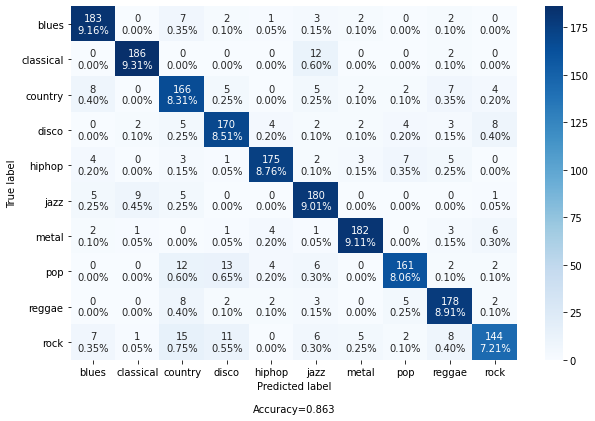

In [4]:
fit_predict_print(rf_fit_predict, X_train, y_train, X_test, y_test)

### 1.2. Search for best hyperparameters by doing randomized cross validation (on 30 sec data set)

Load 30s data.

In [5]:
X30_train, X30_test, y30_train, y30_test = load_preprocess_xy('data/features_30_sec.csv',20, True, False, False) 

Run randomized search CV

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.4min finished


Accuracy:  75.0
Hyperparamters:  {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


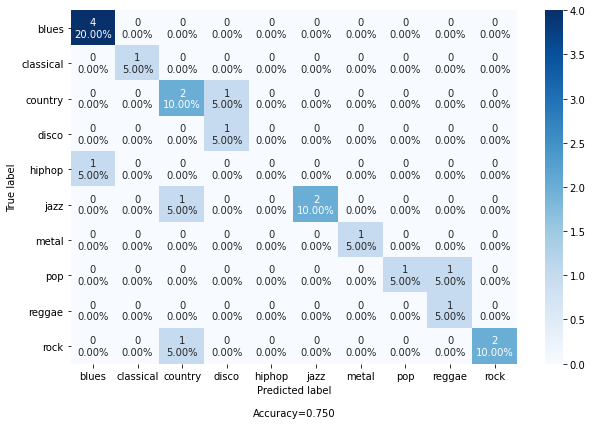

In [4]:
search_fit_predict_print(randomized_search_cv_rf_fit_predict, X30_train, y30_train, X30_test, y30_test)

# 2. K-Means

In [5]:
from k_means import *

X_train_1, y_train_1 = load_preprocess_xy('data/train.csv',0, True, True, False)
X_test_1, y_test_1 = load_preprocess_xy('data/test.csv',0, True, True, False)

### 2.1. Find number clusters by the elbow method

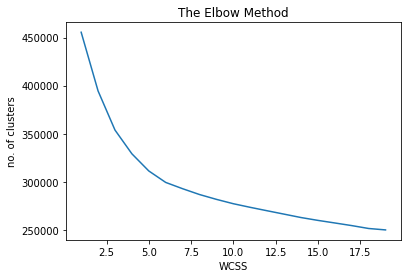

In [6]:
elbow(X_train_1)

### 2.2. Running KMeans with 10 clusters

Accuracy:  10.86086086086086


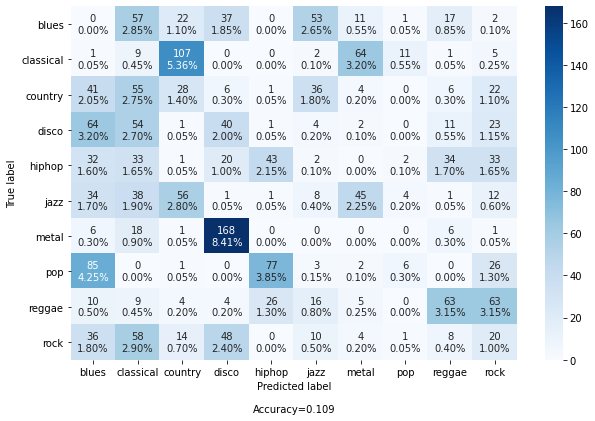

In [6]:
fit_predict_print_unsupervised(kmeans_fit_predict, X_train_1, X_test_1, y_test_1)

# 3. Neural Network

In [7]:
from ann import *

### 3.1. Load data, scale X, encode and dummify y for KFold

In [6]:
X, y = load_preprocess_xy('data/features_3_sec.csv',0, True, True, True)

### 3.2.  Trying out KFold on ANN

Epoch 1/100
800/800 [==============================] - 0s 599us/step - loss: 1.2165 - accuracy: 0.5793
Epoch 2/100
800/800 [==============================] - 0s 616us/step - loss: 0.8010 - accuracy: 0.7217
Epoch 3/100
800/800 [==============================] - 0s 565us/step - loss: 0.6630 - accuracy: 0.7754
Epoch 4/100
800/800 [==============================] - 1s 643us/step - loss: 0.5733 - accuracy: 0.8037
Epoch 5/100
800/800 [==============================] - 1s 643us/step - loss: 0.5100 - accuracy: 0.8244
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4550 - accuracy: 0.8445
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4099 - accuracy: 0.8592
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3693 - accuracy: 0.8753
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3434 - accuracy: 0.8829
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.307

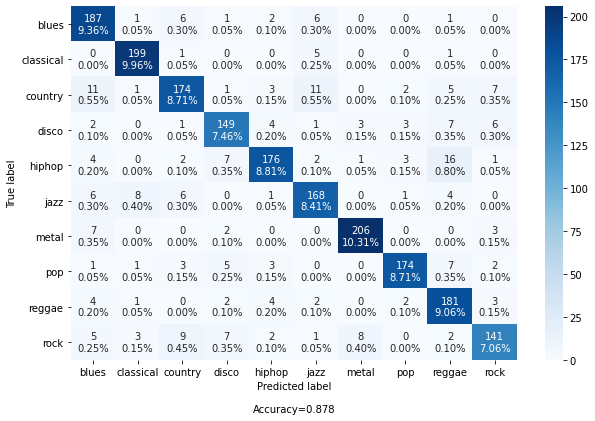

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2093 - accuracy: 0.5691
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7890 - accuracy: 0.7272
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.6524 - accuracy: 0.7759
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.5679 - accuracy: 0.8041
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5035 - accuracy: 0.8242
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4478 - accuracy: 0.8524
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4079 - accuracy: 0.8640
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3656 - accuracy: 0.8746
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8876
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3046 - accura

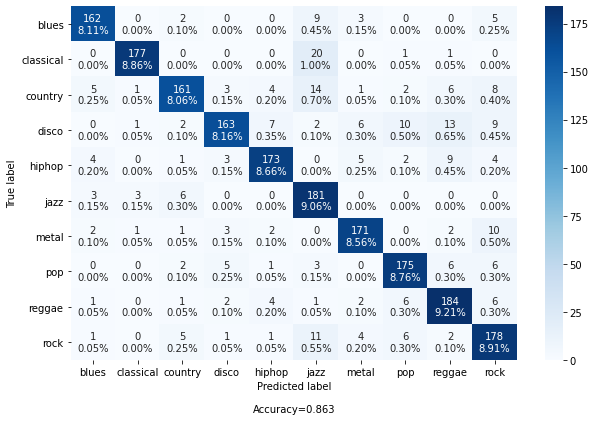

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2407 - accuracy: 0.5678
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7882 - accuracy: 0.7276
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6501 - accuracy: 0.7794
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.8108
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4846 - accuracy: 0.8391
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4370 - accuracy: 0.8519
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3887 - accuracy: 0.8702
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3506 - accuracy: 0.8865
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3193 - accuracy: 0.8958
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2975 - accura

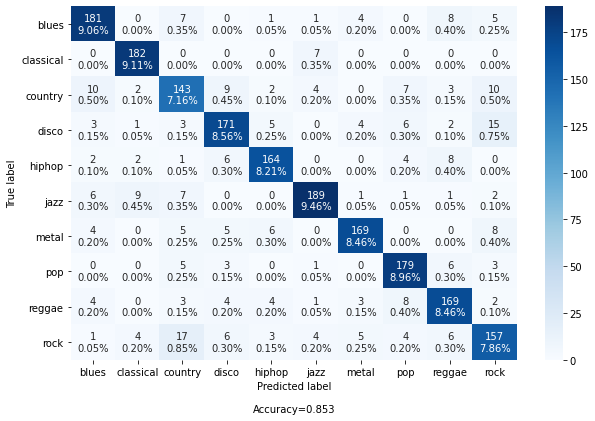

Epoch 1/100
800/800 [==============================] - 1s 990us/step - loss: 1.2795 - accuracy: 0.5566
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.8038 - accuracy: 0.7217
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6512 - accuracy: 0.7802
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.8148
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4853 - accuracy: 0.8360
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.8565
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3803 - accuracy: 0.8755
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3408 - accuracy: 0.8886
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3102 - accuracy: 0.8961
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2862 - accu

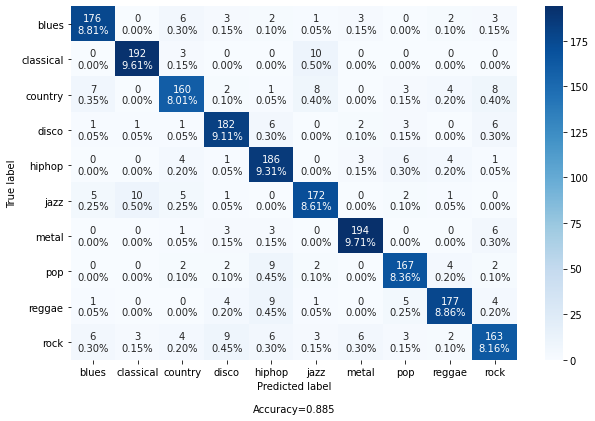

Epoch 1/100
800/800 [==============================] - 1s 797us/step - loss: 1.2436 - accuracy: 0.5623
Epoch 2/100
800/800 [==============================] - 1s 883us/step - loss: 0.7895 - accuracy: 0.7317
Epoch 3/100
800/800 [==============================] - 1s 905us/step - loss: 0.6566 - accuracy: 0.7787
Epoch 4/100
800/800 [==============================] - 1s 906us/step - loss: 0.5610 - accuracy: 0.8124
Epoch 5/100
800/800 [==============================] - 1s 912us/step - loss: 0.4950 - accuracy: 0.8316
Epoch 6/100
800/800 [==============================] - 1s 916us/step - loss: 0.4387 - accuracy: 0.8472
Epoch 7/100
800/800 [==============================] - 1s 899us/step - loss: 0.3954 - accuracy: 0.8650
Epoch 8/100
800/800 [==============================] - 1s 921us/step - loss: 0.3565 - accuracy: 0.8775
Epoch 9/100
800/800 [==============================] - 1s 923us/step - loss: 0.3225 - accuracy: 0.8888
Epoch 10/100
800/800 [==============================] - 1s 969us/step - l

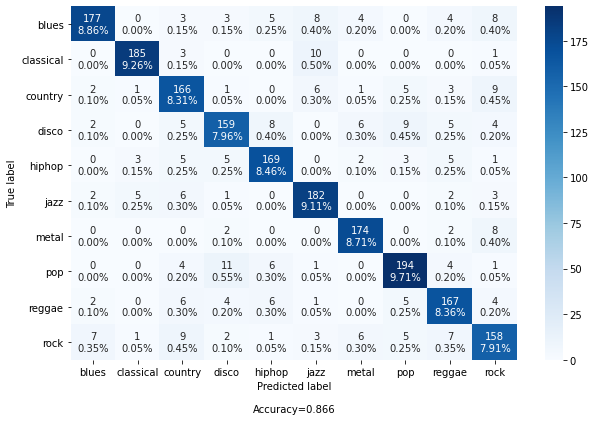

In [12]:
kf=KFold(n_splits=5, shuffle=True, random_state=True)

for train_index,test_index in kf.split(X):
  X_train,X_test,y_train,y_test=X[train_index],X[test_index],y[train_index],y[test_index]
  fit_predict_print(nn_fit_predict,X_train,y_train,X_test,y_test)

### 3.3. Running NN

Epoch 1/100
800/800 [==============================] - 0s 603us/step - loss: 1.2419 - accuracy: 0.5561
Epoch 2/100
800/800 [==============================] - 0s 561us/step - loss: 0.7937 - accuracy: 0.7241
Epoch 3/100
800/800 [==============================] - 0s 580us/step - loss: 0.6519 - accuracy: 0.7720
Epoch 4/100
800/800 [==============================] - 1s 926us/step - loss: 0.5693 - accuracy: 0.8017
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5028 - accuracy: 0.8252
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4452 - accuracy: 0.8475
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4025 - accuracy: 0.8624
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3599 - accuracy: 0.8770
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3249 - accuracy: 0.8874
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3030 

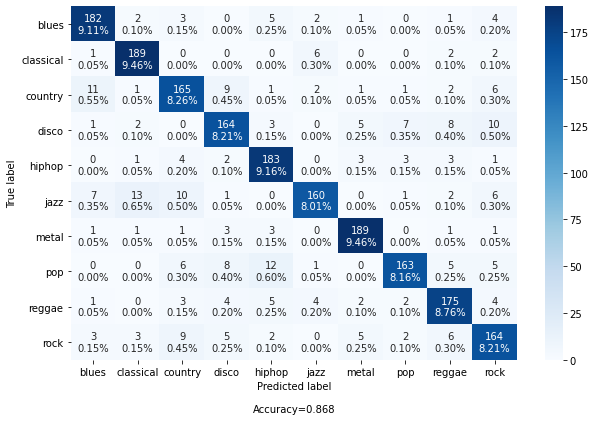

In [11]:
X_train_2, y_train_2 = load_preprocess_xy('data/train.csv',0, True, True, True)
X_test_2, y_test_2 = load_preprocess_xy('data/test.csv',0, True, True, True)

fit_predict_print(nn_fit_predict,X_train_2,y_train_2,X_test_2,y_test_2)

# 4. SVM

In [9]:
from svm import *

Accuracy:  89.23923923923924


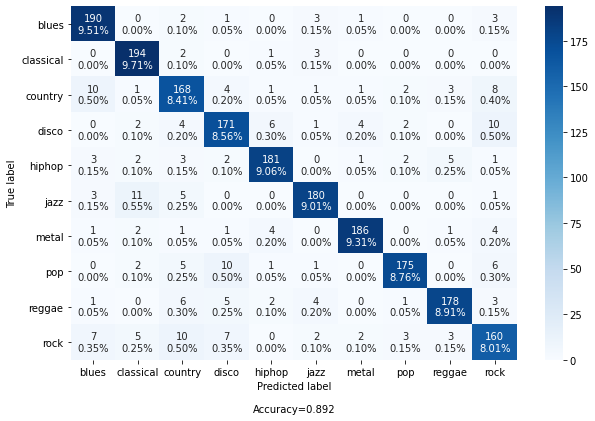

In [10]:
fit_predict_print(svm_fit_predict, X_train, y_train, X_test, y_test)